<a href="https://colab.research.google.com/github/Aphelion-Helios/EUR-USD-Exchange-Rate-Modeling/blob/main/EUR_USD_ERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating EUR USD Exchange Rate paths using CIR Model. CIR Model is used to capture mean reverting behaviour in the financial data, like interest rates or volatility.

Generating exchange rate paths by simulation will involve calibrating the model parameters using historical data.

#**EUR-USD Exchange Rate Modeling**


#COX-INGERSOLL-ROSS Model





$$dr_{t} = a\ (b - r_{t})\ dt + {\sigma \sqrt{r_{t}}\ dW_t}$$



#Calibration Loss Function


$$Loss\ (P, r, dt) = \sum_{i=1}^n\ (SimulatedRate_{i} - r_{i})^2$$



In [ ]:
import numpy as np
from scipy.optimize import minimize
import yfinance as yf
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Calibrated Parameters: [0.1004104  1.2005571  0.05228233]


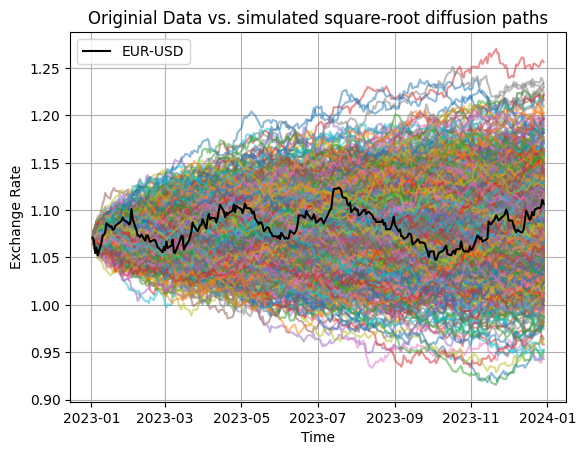

In [ ]:
# Load historical exchange rate data
data = yf.download ('EURUSD=X', start='2023-01-01', end='2024-01-01')
exchange_rate = data['Close'].values

# Define the CIR model function
def cir_model (params, r, dt) :
    a, b, sigma = params
    dr = (a * (b - r) * dt +
    sigma * np.sqrt (r) * np.sqrt (dt) * np.random.standard_normal ())
    return dr

# Define the loss function to be minimized
def loss_function (params, r, dt) :
    simulated_rates = [0]
    for i in range (len (r) - 1) :
      simulated_rates.append (
          simulated_rates [i] +
          cir_model(params, simulated_rates[i], dt))
    simulated_rates = np.array(simulated_rates)
    return np.sum((simulated_rates - r) ** 2)

# Intitial paramater guess
initial_params = [0.1, 1.2, 0.05]

# Calibration using optimization
result = minimize(loss_function,
                  initial_params,
                  args= (exchange_rate, 1),
                  method= 'Nelder-Mead')

# Extract calibrated parameters
calibrated_params = result.x
print("Calibrated Parameters:", calibrated_params)

# Load historical exchange rate data
data = yf.download('EURUSD=X', start='2023-01-01', end='2024-01-01')
exchange_rate = data['Close']
time_points = data.index
dt = 1/252 # Time step
for _ in range(1000) :
    simulated_rates = [exchange_rate[0]]
    for i in range(len(exchange_rate) - 1) :
      simulated_rates.append(
          simulated_rates[i] +
          cir_model (calibrated_params, simulated_rates[i], dt))

    # Plot comparison
    plt.plot(time_points, simulated_rates, alpha=0.5)
plt.plot (time_points, exchange_rate, label='EUR-USD', color='black')
plt.xlabel ('Time')
plt.ylabel ('Exchange Rate')
plt.title ('Originial Data vs. simulated square-root diffusion paths')
plt.legend()
plt.grid(True)